In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df_raw = pd.read_csv('driver-data.csv', low_memory=False)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


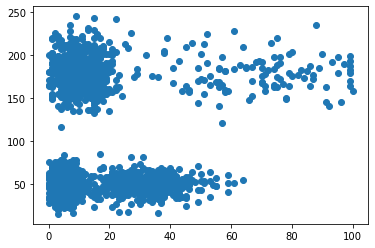

In [3]:
plt.scatter(df_raw.mean_over_speed_perc, df_raw.mean_dist_day)

In [4]:
df_raw.head()
df_raw.drop('id', axis=1, inplace=True)

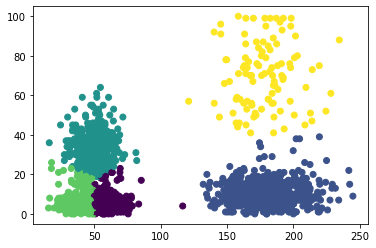

In [5]:
model_km = KMeans(n_clusters=5).fit(df_raw)
df_raw['clusters'] = model_km.labels_
plt.scatter(df_raw.mean_dist_day, df_raw.mean_over_speed_perc,
            c=df_raw['clusters'])

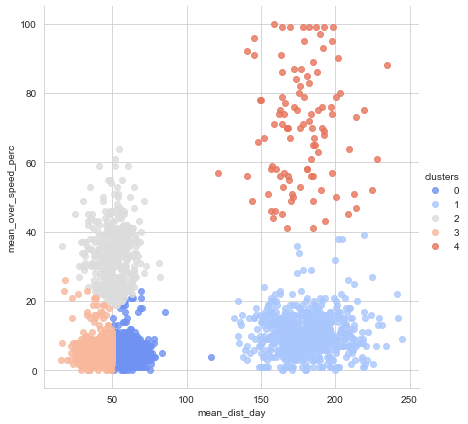

In [6]:
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day', 'mean_over_speed_perc',data=df_raw, hue='clusters',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

In [7]:
import time
sse = {}
clusterss = None
start_time = time.time()
for k in range(1,17):
    
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_raw)
    clusterss = kmeans.labels_
    sse[k] = kmeans.inertia_
    print(f'iter {k} | Total Time: {time.time()-start_time} | sse: {kmeans.inertia_}')

iter 1 | Total Time: 1.068190574645996 | sse: 12191846.093627965
iter 2 | Total Time: 1.125185251235962 | sse: 1323627.7618852227
iter 3 | Total Time: 1.229184865951538 | sse: 999025.8714209672
iter 4 | Total Time: 1.3551876544952393 | sse: 725902.8443226195
iter 5 | Total Time: 1.530188798904419 | sse: 534651.5958290263
iter 6 | Total Time: 1.697187900543213 | sse: 372895.7566000406
iter 7 | Total Time: 1.9031877517700195 | sse: 322911.9911255836
iter 8 | Total Time: 2.152188777923584 | sse: 279965.0221221955
iter 9 | Total Time: 2.4471874237060547 | sse: 255632.52610035657
iter 10 | Total Time: 2.7221903800964355 | sse: 231111.21002139262
iter 11 | Total Time: 3.0241873264312744 | sse: 209949.09859463436
iter 12 | Total Time: 3.3671865463256836 | sse: 189153.42060112365
iter 13 | Total Time: 3.712186098098755 | sse: 173336.20562529433
iter 14 | Total Time: 4.079185247421265 | sse: 159255.23791432605
iter 15 | Total Time: 4.459187269210815 | sse: 150757.63893319076
iter 16 | Total Tim

In [8]:
sse

{1: 12191846.093627965,
 2: 1323627.7618852227,
 3: 999025.8714209672,
 4: 725902.8443226195,
 5: 534651.5958290263,
 6: 372895.7566000406,
 7: 322911.9911255836,
 8: 279965.0221221955,
 9: 255632.52610035657,
 10: 231111.21002139262,
 11: 209949.09859463436,
 12: 189153.42060112365,
 13: 173336.20562529433,
 14: 159255.23791432605,
 15: 150757.63893319076,
 16: 141647.25378974655}

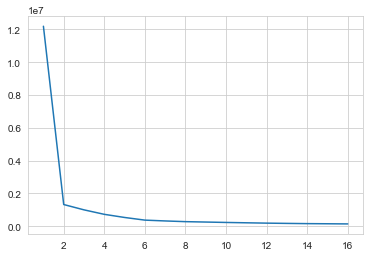

In [9]:
plt.plot(list(sse.keys()), list(sse.values()))

># At 2 clusters and 6 is where we can see the 'elbow'. For model purposes, I am going to use the median 4 clusters

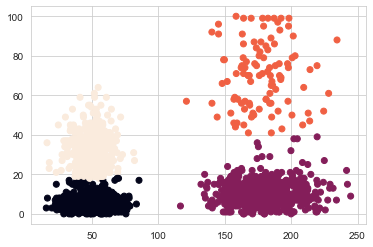

In [14]:
kmeans_final = KMeans(n_clusters=4, max_iter=1000).fit(df_raw)
df_raw['clusters'] = kmeans_final.labels_
plt.scatter(df_raw.mean_dist_day, df_raw.mean_over_speed_perc,
            c=df_raw['clusters'])

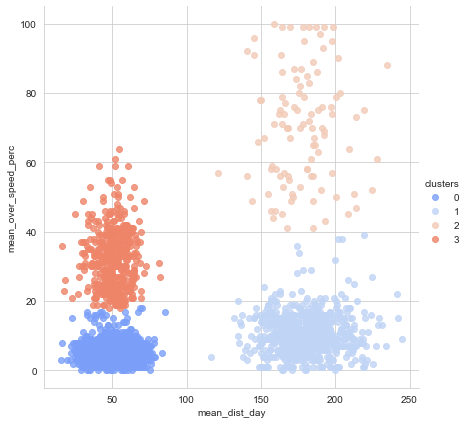

In [15]:
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day', 'mean_over_speed_perc',data=df_raw, hue='clusters',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)